# Chicago Crime Investigation

Due to increasing crimes, they want to make use of data to strategize better to maintain peace and order in their State. As a part of their Analyst team, you have been posed with some questions given below. Use your gained Data Analysis skills to answer these questions and help of the Police Department!

Each observation is the crime of theft of a car

This dataset is part of Chicago crime investigation (hypothetical), the idea is to use data analysis techniques to gain data insights and help chicago crime investigation unit to solve crime problem

### Data Columns details:

ID: a unique identifier for each observation.

Date: the date the crime occurred. LocationDescription: the location where the crime occurred.

Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).

Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).

Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

Year: the year in which the crime occurred. Latitude: the latitude of the location at which the crime occurred.

# Business Problems

1- On which month did the lowest and highest motor vehicle thefts occur? <br>
2- On which month highest and lowest percentage arrests occur?<br>
3- On which weekday did most motor vehicle thefts occur?<br>
4- Determine the percentage arrests on different weekdays<br>
5- Determining percentage of arrests in different months<br>
6- What are the number of arrests and crimes committed in each year?<br>
7- Which are the top five locations for motor vehicle thefts?<br>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read in the data with explicit data types for columns 7 and 8
data = pd.read_csv('Chicago_Crime_Detective.csv', dtype={'column_7': str, 'column_8': str})

C:\Users\itsme_shaad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
# getting descriptive statistics
data.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


# Missing Data analysis

In [5]:
data.isnull().mean()

Unnamed: 0             0.000000
ID                     0.000000
Date                   0.000000
LocationDescription    0.000000
Arrest                 0.000000
Domestic               0.000000
Beat                   0.000000
District               0.224649
CommunityArea          0.128381
Year                   0.000000
dtype: float64

In [6]:
# we can obseerve that district column has around 22% and communityarea column has 12% missing values

In [7]:
data.District.unique()

array(['6', '12', '16', '7', '2', '25', '4', '10', '9', '8', '18', '17',
       '1', '5', '19', '3', '15', nan, '24', '11', '14', '20', '22', '13',
       ' ', 5.0, 18.0, 13.0, 22.0, 3.0, 10.0, 25.0, 6.0, 16.0, 2.0, 9.0,
       8.0, 4.0, 1.0, 19.0, 15.0, 12.0, 24.0, 7.0, 11.0, 14.0, 17.0, 20.0,
       31.0, 21.0, 23.0], dtype=object)

In [8]:
data.CommunityArea.unique()

array(['69', '24', '11', '67', '35', '19', '48', '40', '29', '58', '66',
       '8', '70', '14', '32', '49', '7', '45', '6', '43', '63', '38', '5',
       '25', '76', '34', '62', '61', '17', '16', '30', '44', '18', '1',
       '2', '27', '39', '31', '23', '21', '28', '50', '20', '46', '64',
       '77', '53', '42', '52', '65', '56', '73', '68', '71', '13', '22',
       '4', '15', '75', '57', '12', '54', '47', '26', '3', '41', '60',
       '36', '37', '72', '51', '59', '10', '74', '33', '9', '55', ' ',
       nan, '0', 71.0, 40.0, 22.0, 61.0, 53.0, 66.0, 24.0, 47.0, 2.0,
       19.0, 46.0, 58.0, 13.0, 1.0, 25.0, 23.0, 43.0, 67.0, 70.0, 17.0,
       28.0, 65.0, 75.0, 68.0, 48.0, 37.0, 56.0, 39.0, 8.0, 7.0, 30.0,
       15.0, 31.0, 44.0, 18.0, 51.0, 6.0, 63.0, 60.0, 35.0, 42.0, 29.0,
       73.0, 49.0, 33.0, 45.0, 21.0, 69.0, 38.0, 3.0, 54.0, 26.0, 32.0,
       50.0, 59.0, 12.0, 62.0, 41.0, 16.0, 14.0, 5.0, 34.0, 11.0, 72.0,
       4.0, 20.0, 77.0, 64.0, 10.0, 27.0, 55.0, 52.0, 36.0, 57.0

In [9]:
data = data.dropna(subset=['District'])
data = data.dropna(subset=['CommunityArea'])

# dropping rows where District and communityarea have null values, because they are important in analysis

In [13]:
# after dropping
data.isnull().sum()

Unnamed: 0             0
ID                     0
Date                   0
LocationDescription    0
Arrest                 0
Domestic               0
Beat                   0
District               0
CommunityArea          0
Year                   0
dtype: int64

In [10]:
# getting datatypes
data.dtypes

Unnamed: 0              int64
ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [11]:
# Converting Date column to datetime datatype
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [12]:
# checking datatypes after converting Date column to datetime
data.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

# Feature Engineering

In [20]:
# Creating multiple columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data['Weekday'] = data['Date'].dt.weekday_name
data.head()


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Week,Weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,1,Monday
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,1,Monday
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,1,Monday
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,1,Monday
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,1,Monday


# On which month did the lowest and highest motor vehicle thefts occur? 

#### Creating plot_crimes function

In [56]:
def plot_crimes(data, xlabel, ylabel, title, day_order = False):
    '''
    Plot the count of crimes by a given time period using seaborn barplot.

    Parameters:
        data (pandas.Series): A pandas series object containing the count of crimes.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        day_order (list, optional): A list containing the order of the x-axis values. Defaults to False.
    
    output: Datavisual
    '''

    
    sns.set(style='white')
    plt.figure(figsize=(8, 6))
    sns.barplot(x= data.index, y= data.values, color='lightblue' )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()


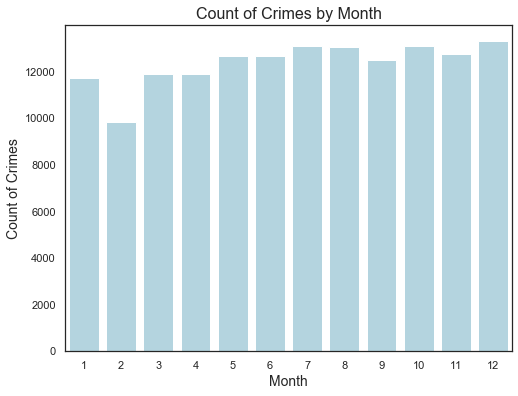

In [57]:
monthly_counts = data.groupby('Month').Date.count()
plot_crimes_month(monthly_counts, 'Month','Count of Crimes','Count of Crimes by Month')

### Observations:
October has the highest crimes 
while February has the lowest crimes

# On which month highest and lowest percentage arrests occur?

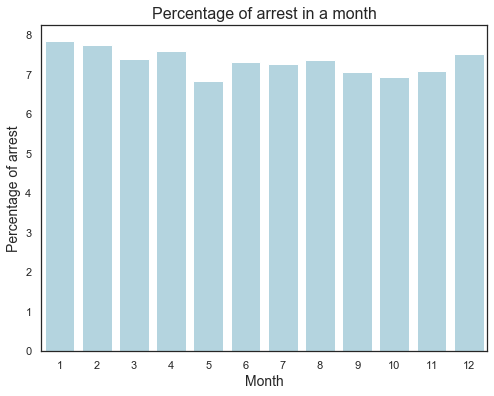

In [59]:
Montly_arrest_percentage = (data[data['Arrest']== True].groupby('Month').Date.count()/data.groupby('Month').Date.count())*100

plot_crimes(Montly_arrest_percentage, 'Month', 'Percentage of arrest', 'Percentage of arrest in a month')

### Observation
February has lowest crimes, however it has the highest arrest percentage, while May has the lowest arrests percentage

# On which weekday did most motor vehicle thefts occur? 

#### Creating plot_crimes_weekday function

In [81]:
def plot_crimes_weekday(data, xlabel, ylabel, title, day_order = False):
    '''
    Plot the count of crimes by a given time period using seaborn barplot.

    Parameters:
        data (pandas.Series): A pandas series object containing the count of crimes.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        day_order (list, optional): A list containing the order of the x-axis values. Defaults to False.
    
    output: Datavisual
    '''

    sns.set(style='white')
    plt.figure(figsize=(8, 6))
    sns.barplot(x= data.index, y= data.values, color='lightgreen' ,order = day_order )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()


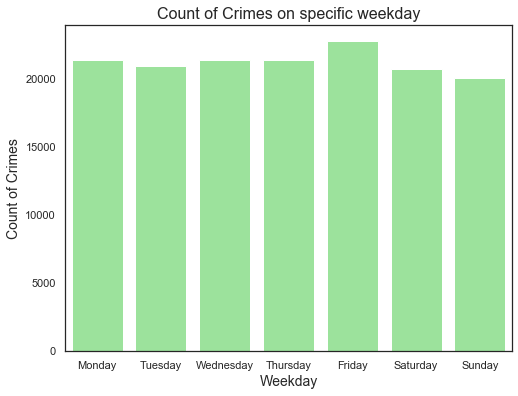

In [82]:
weekday_counts = data.groupby('Weekday').Date.count()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot_crimes_weekday(weekday_counts,  'Weekday', 'Count of Crimes','Count of Crimes on specific weekday', day_order)

### Observations:
Wednesday and Thursday have equal crimes, while Friday has the highest count of crimes committed

# Determine the percentage arrests on different weekdays

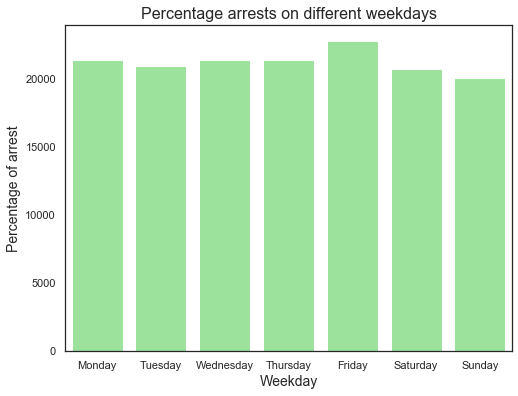

In [83]:
weekday_per_arrest = (data[data['Arrest']== True].groupby('Weekday').Date.count()/data.groupby('Weekday').Date.count())*100
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot_crimes_weekday(weekday_counts,  'Weekday', 'Percentage of arrest','Percentage arrests on different weekdays', day_order)

### Observations:

We can observe the percentage of arrest is increasing as the days passes towards sunday, Sunday having the highest percentage of arrests observed

# Determining percentage of arrests in different months

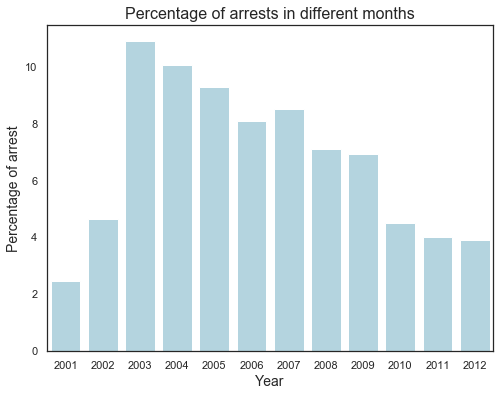

In [84]:
arrest_per_yearly = (data[data['Arrest']== True].groupby('Year').Date.count()/data.groupby('Year').Date.count())*100
plot_crimes(arrest_per_yearly,'Year',  'Percentage of arrest', 'Percentage of arrests in different months')

### Observations:

Over the year arrest percentage has decreased, it may be because the number of crimes per year has decreased

In [85]:
import seaborn as sns
import numpy as np
%matplotlib inline

# What are the number of arrests and crimes committed in each year?

#### creating count_plot function

In [86]:
def count_plot(x, data, hue, xlabel, ylabel, title):
    '''
    Plot the count of crimes by a given time period using seaborn barplot.

    Parameters:
        data (pandas.Series): A pandas series object containing the count of crimes.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        day_order (list, optional): A list containing the order of the x-axis values. Defaults to False.
    
    output: Datavisual
    '''

    # Number of crimes and arrests year wise
    sns.countplot(x=x,data=data, hue = hue)
    #plt.figure(figsize=(10, 8))
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()

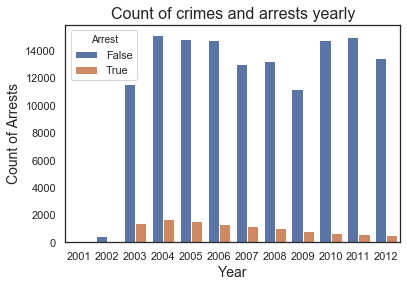

In [70]:
count_plot('Year',data, 'Arrest','Year','Count of Arrests','Count of crimes and arrests yearly')

### Observations:

In the above graph we can see that the count of crimes is increasing but the arrests are decreasing, this could be because of the sophisticated ways of committing crime

# Which are the top five locations for motor vehicle thefts?

In [72]:
data.LocationDescription.value_counts().head(5)

STREET                            122572
PARKING LOT/GARAGE(NON.RESID.)     10310
OTHER                               3270
ALLEY                               1688
GAS STATION                         1584
Name: LocationDescription, dtype: int64

#### creating plot_crimes_top5 function

In [87]:
def plot_crimes_top5(data, xlabel, ylabel, title, day_order = False):
    '''
    Plot the count of crimes by a given time period using seaborn barplot.

    Parameters:
        data (pandas.Series): A pandas series object containing the count of crimes.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        day_order (list, optional): A list containing the order of the x-axis values. Defaults to False.
    
    output: Datavisual
    '''

    
    sns.set(style='white')
    plt.figure(figsize=(8, 6))
    sns.barplot(x= data.index, y= data.values, color='lightgreen' )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    # Rotate the x-axis tick labels to be perpendicular
    plt.xticks(rotation=75, ha='center')
    plt.show()


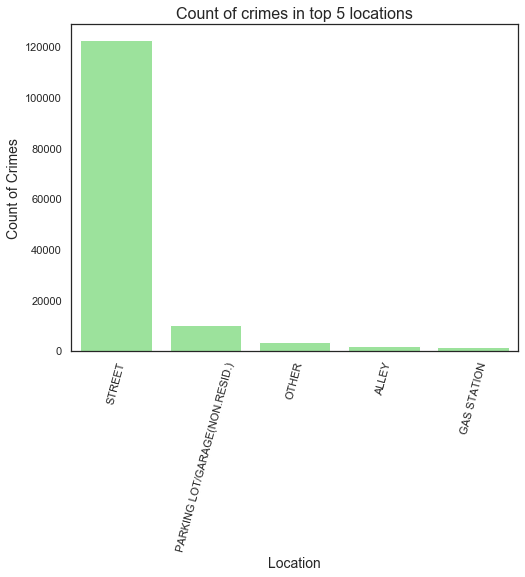

In [80]:
location_wise_top5 = data.LocationDescription.value_counts().head(5)
plot_crimes_top5(location_wise_top5, 'Location', 'Count of Crimes', 'Count of crimes in top 5 locations')


### Observations:

It can be observed that crimes are generally occures on streets, while rest of the locations are right skewed

# Reference

https://stackoverflow.com/questions/53231075/ipython-name-plt-not-defined <br>
https://pandas.pydata.org/docs/user_guide/10min.html <br>
https://www.kaggle.com/code/btphan/10-minutes-to-pandas <br>